In [4]:
"""
AOC
AUC
pipeline
"""
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
digits=datasets.load_digits()
feature=digits.data
target=digits.target
scalar=StandardScaler()
logit=LogisticRegression()
pipeline=make_pipeline(scalar,logit)
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [6]:
cv_result=cross_val_score(
    pipeline,
    feature,
    target,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1
)

In [7]:
cv_result

array([0.97222222, 0.97777778, 0.95555556, 0.95      , 0.95555556,
       0.98333333, 0.97777778, 0.96648045, 0.96089385, 0.94972067])

In [8]:
cv_result.mean()

0.964931719428926

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [10]:
x,y=make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=1
)
logit=LogisticRegression()
cross_val_score(logit,x,y,scoring="accuracy")

E:\DEEPENV\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

In [11]:
cross_val_score(logit,x,y,scoring='precision')

E:\DEEPENV\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [13]:
feature,target=make_classification(
    n_samples=10000,
    n_features=10,
    n_classes=2,
    n_informative=3,
    random_state=3
)
feature_train,feature_test,target_train,target_test=train_test_split(
    feature,target,test_size=0.1,random_state=1
)

In [14]:
logit=LogisticRegression()
logit.fit(feature_train,target_train)
target_prob=logit.predict_proba(feature_test)[:,1]
fpr,tpr,threshold=roc_curve(target_test,target_prob)

E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


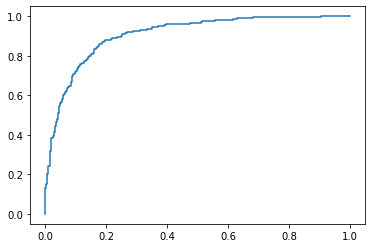

In [15]:
plt.plot(fpr,tpr)
plt.show()

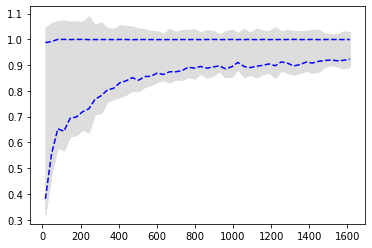

In [17]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
digits = load_digits()
feature, target = digits.data, digits.target
train_size,train_score,test_score=learning_curve(
    RandomForestClassifier(),
    feature,
    target,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.01,1.0,50)
)
train_mean=np.mean(train_score,axis=1)
train_std=np.std(test_score,axis=1)
test_mean=np.mean(test_score,axis=1)
test_std=np.std(test_score,axis=1)
plt.plot(train_size,train_mean,'--',color='b')
plt.plot(train_size,test_mean,'--',color='b')
plt.fill_between(train_size,test_mean-test_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_size,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.show()

In [18]:
from sklearn import datasets
from sklearn.metrics import classification_report
iris=datasets.load_iris()
feature=iris.data
target=iris.target
class_name=iris.target_names
feature_train,feature_test,target_train,target_test=train_test_split(
    feature,target,random_state=1
)
classifier=LogisticRegression()
model=classifier.fit(feature_train,target_train)
target_pre=model.predict(feature_test)
print(
    classification_report(
        target_test,
        target_pre,
        
        target_names=class_name
    
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\DEEPENV\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
